# Force Data Analysis

Plot/average force timeseries. The first sample in each file is normalized to **1.0 s**.

In [21]:
import os
from data_analysis_modules.force_io import list_force_designs, find_force_csvs, load_force_timeseries
from data_analysis_modules.force_averaging import average_design_force, average_all_force_designs
from data_analysis_modules.force_plotting import plot_force_metric_for_design, plot_force_metrics_across_designs, plot_force_vs_position_across_designs
from data_analysis_modules.cross_plotting import plot_displacement_vs_force, plot_displacement_vs_force_across_designs


# auto update functions
%load_ext autoreload
%autoreload 2

ROOT = r"./force_data_extracted/ExRunCollapse0"  # <- change me
list_force_designs(ROOT)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


['collapse0', 'collapse0a', 'collapse0b']

""


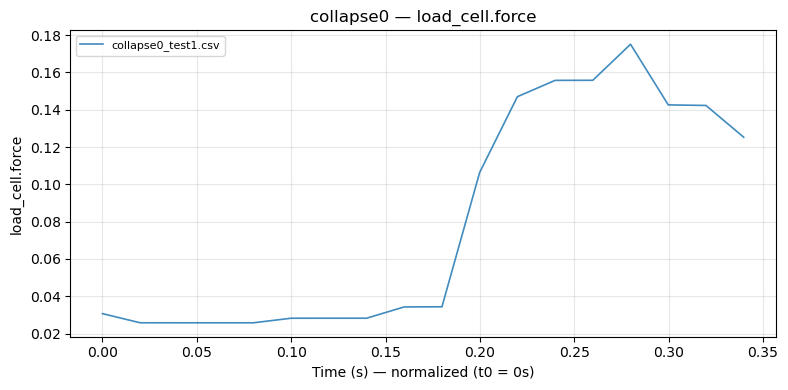

In [22]:
DESIGN = 'collapse0'
METRIC = 'load_cell.force'
plot_force_metric_for_design(ROOT, DESIGN, METRIC, with_average=True, time_step=None, figsize=(8,4), smooth=False)

In [23]:
OUT_DIR = os.path.join(ROOT, '_force_averages')
METRICS = ['load_cell.force', 'position']
DERIVED = None
average_all_force_designs(ROOT, METRICS, OUT_DIR, time_step=None, derived=DERIVED)

{'collapse0': 'force_data_extracted/ExRunCollapse0/_force_averages/collapse0__force_avg.csv',
 'collapse0a': 'force_data_extracted/ExRunCollapse0/_force_averages/collapse0a__force_avg.csv',
 'collapse0b': 'force_data_extracted/ExRunCollapse0/_force_averages/collapse0b__force_avg.csv'}

{'collapse0':       time_s  position
 0   0.000000  0.000000
 1   0.019988  0.064801
 2   0.039976  0.187500
 3   0.059963  0.300265
 4   0.079951  0.418569
 5   0.099939  0.477150
 6   0.119927  0.594922
 7   0.139915  0.716084
 8   0.159903  0.777296
 9   0.179890  0.768879
 10  0.199878  0.766430
 11  0.219866  0.766418
 12  0.239854  0.766418
 13  0.259842  0.766418
 14  0.279830  0.766418
 15  0.299817  0.766418
 16  0.319805  0.766418
 17  0.339793  0.766418,
 'collapse0a':       time_s  position
 0   0.000000  0.000000
 1   0.019999  0.097277
 2   0.039998  0.217506
 3   0.059996  0.295744
 4   0.079995  0.393686
 5   0.099994  0.513823
 6   0.119993  0.593010
 7   0.139992  0.713125
 8   0.159990  0.812795
 9   0.179989  0.908886
 10  0.199988  1.013059
 11  0.219987  1.111533
 12  0.239985  1.229690
 13  0.259984  1.310387
 14  0.279983  1.408373
 15  0.299982  1.526512
 16  0.319981  1.607462
 17  0.339979  1.704955,
 'collapse0b':       time_s  position
 0   0.000000  0.0000

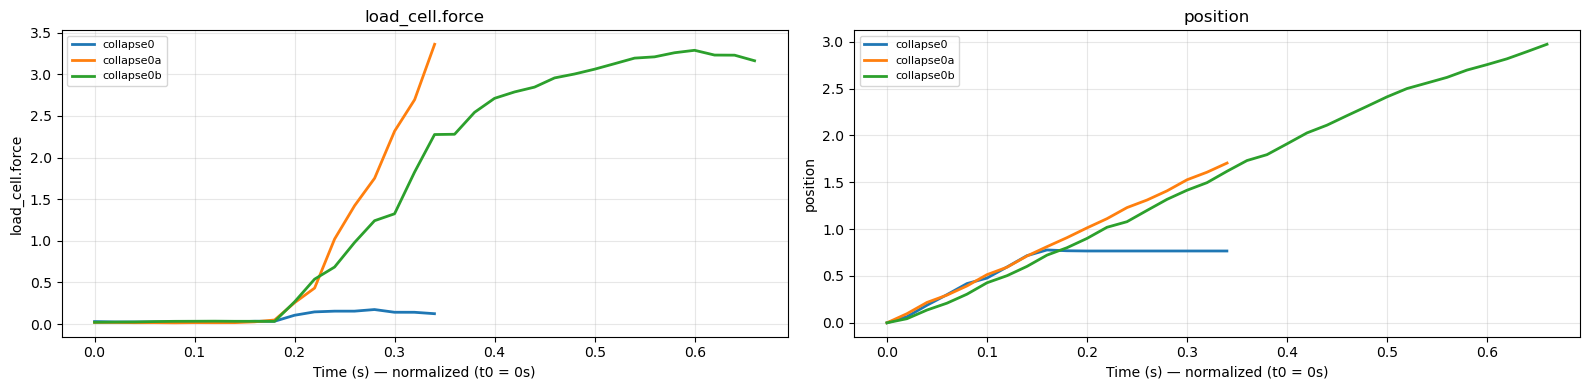

In [24]:
plot_force_metrics_across_designs(
    root=ROOT,
    designs=None,
    metrics=("load_cell.force", "position"),
    use_average=True,
    averages_dir=os.path.join(ROOT, '_force_averages'),
    time_step=None,
    cols=2,
    figsize=(8,4),
    smooth=False,
)

,time_s,position,load_cell.force
0,0.000000,0.000000,0.022078
1,0.019994,0.006560,0.022443
2,0.039988,0.025997,0.022940
3,0.059982,0.053533,0.024096
4,0.079976,0.091306,0.025510
5,0.099970,0.141659,0.026835
6,0.119964,0.195800,0.028145
7,0.139958,0.256732,0.029014
8,0.159952,0.326543,0.029752
9,0.179946,0.397755,0.030258


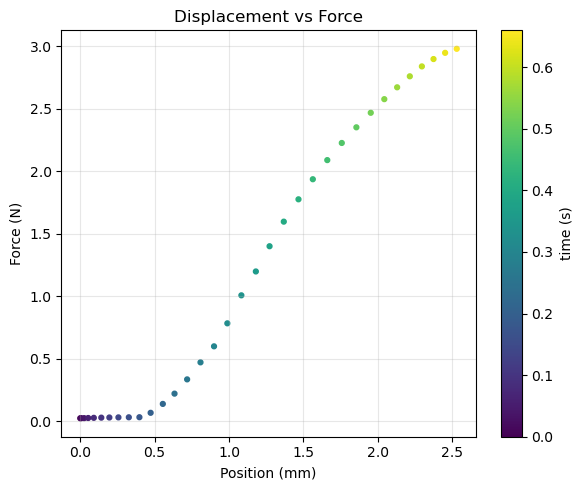

In [25]:
plot_displacement_vs_force(
    root=ROOT,
    design="collapse0b",                                # pick a design
    use_average=True,                                 
    force_averages_dir=os.path.join(ROOT, "_force_averages"),
    time_step=None,                                   # auto
    smooth={"method": "ema", "alpha": 0.15},          # optional smoothing
    style="scatter",                                  # or "line"
    color_by_time=True,                               # color points by time
    figsize=(6,5),
    title="Displacement vs Force",
    xlabel="Position (mm)",
    ylabel="Force (N)"
)

<string>:88: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{}

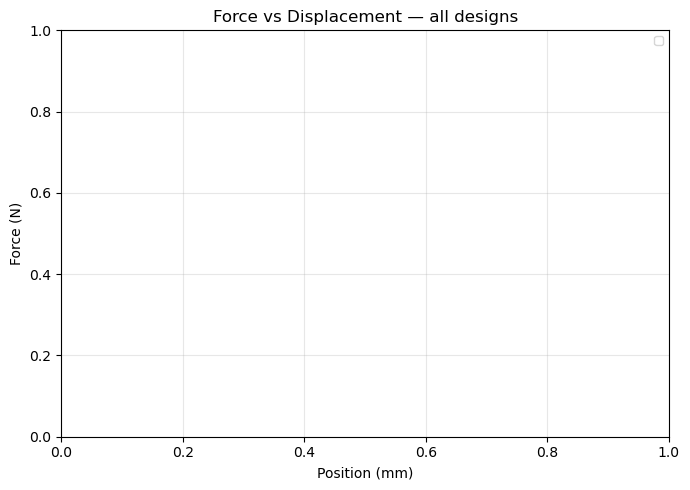

In [26]:


plot_displacement_vs_force_across_designs(
    root=ROOT,
    designs=None,  # or e.g. ['bending0','bending3','LINEAR1']
    disp_metric="position",
    force_metric="load_cell.force",
    use_average=True,
    deform_averages_dir=os.path.join(ROOT, "_averages"),
    force_averages_dir=os.path.join(ROOT, "_force_averages"),
    compute_if_missing=True,                # will create missing averages with required metrics
    time_step=None,                         # auto
    smooth={"method": "ema", "alpha": 0.12},
    style="line",                           # or "scatter"
    figsize=(7,5),
    title="Force vs Displacement — all designs",
    xlabel="Position (mm)",
    ylabel="Force (N)",
    save_path=os.path.join(ROOT, "_plots", "force_vs_disp_across_designs.png"),
)

[skip] collapse0__force_avg: missing column 'position' in ./force_data_extracted/ExRunCollapse0/_force_averages/collapse0__force_avg__force_avg.csv
[skip] collapse0__force_avg__force_avg: missing column 'position' in ./force_data_extracted/ExRunCollapse0/_force_averages/collapse0__force_avg__force_avg__force_avg.csv
[skip] collapse0a__force_avg: missing column 'position' in ./force_data_extracted/ExRunCollapse0/_force_averages/collapse0a__force_avg__force_avg.csv
[skip] collapse0a__force_avg__force_avg: missing column 'position' in ./force_data_extracted/ExRunCollapse0/_force_averages/collapse0a__force_avg__force_avg__force_avg.csv
[skip] collapse0b__force_avg: missing column 'position' in ./force_data_extracted/ExRunCollapse0/_force_averages/collapse0b__force_avg__force_avg.csv
[skip] collapse0b__force_avg__force_avg: missing column 'position' in ./force_data_extracted/ExRunCollapse0/_force_averages/collapse0b__force_avg__force_avg__force_avg.csv


{'collapse0':     position  load_cell.force
 0   0.000000         0.030664
 1   0.064801         0.025762
 2   0.187500         0.025758
 3   0.300265         0.025758
 4   0.418569         0.025758
 5   0.477150         0.028202
 6   0.594922         0.028211
 7   0.716084         0.028211
 15  0.766418         0.142585
 14  0.766418         0.175087
 13  0.766418         0.155774
 12  0.766418         0.155725
 17  0.766418         0.125261
 16  0.766418         0.142282
 11  0.766418         0.146975
 10  0.766430         0.106355
 9   0.768879         0.034344
 8   0.777296         0.034260,
 'collapse0a':     position  load_cell.force
 0   0.000000         0.020443
 1   0.097277         0.020437
 2   0.217506         0.017583
 3   0.295744         0.017990
 4   0.393686         0.015971
 5   0.513823         0.018397
 6   0.593010         0.017582
 7   0.713125         0.017989
 8   0.812795         0.027402
 9   0.908886         0.049626
 10  1.013059         0.257491
 11  1.1115

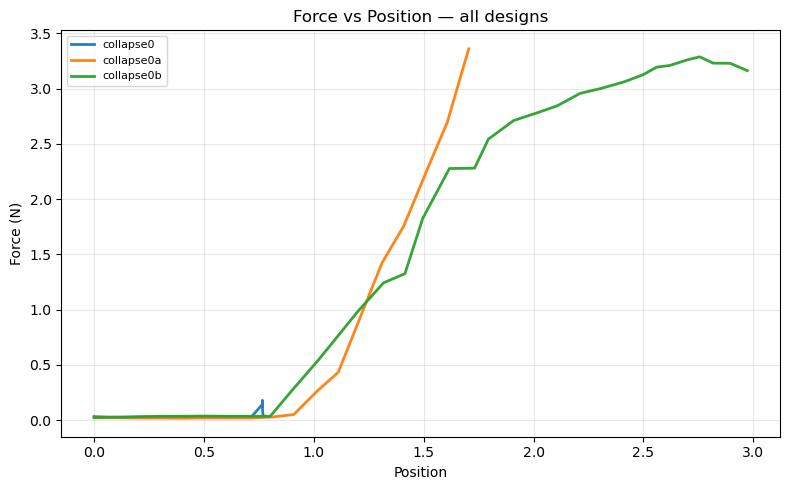

In [27]:
plot_force_vs_position_across_designs(
    averages_dir=os.path.join(ROOT, "_force_averages"),
    designs=None,                 # or e.g. ['bending0','LINEAR1']
    position_col="position",
    force_col="load_cell.force",
    style="line",                 # or "scatter"
    figsize=(8,5),
    title="Force vs Position — all designs",
    xlabel="Position",
    ylabel="Force (N)",
    legend=True,
    save_path=os.path.join(ROOT, "_plots", "force_vs_position_across_designs.png"),
)